### Plotting notebook

### Import necessary packages

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import glob
import re
import io
import os
import sys 
sys.path.append('..')
from brian2 import *
import brian_utils.postproc as bup
import pickle
import random
from collections import OrderedDict
cmaps = OrderedDict()
#matplotlib.style.use('ggplot')

### Create line plot of instantaneous frequency, amplitude, or width throughout the simulation

In [2]:
# Example: line_plot(df, 'Burst Amp', '+')
def line_plot(df, response, g_nap_sign, run_seed):
    single_sim = df.loc[df['run_seed'] == run_seed]
    
    g_nap_01 = single_sim.loc[single_sim['g_nap_str'] == 0.1]
    #g_nap_02 = single_sim[single_sim['g_nap_str'] == 0.2]
    g_nap_03 = single_sim.loc[single_sim['g_nap_str'] == 0.3]
    #g_nap_04 = single_sim[single_sim['g_nap_str'] == 0.4]
    g_nap_05 = single_sim.loc[single_sim['g_nap_str'] == 0.5]
    
    g_nap_neg01 = single_sim.loc[single_sim['g_nap_str'] == -0.1]
    #g_nap_neg02 = df.loc[df['g_nap_str'] == -0.2]
    g_nap_neg03 = single_sim.loc[single_sim['g_nap_str'] == -0.3]
    #g_nap_neg04 = single_sim.loc[single_sim['g_nap_str'] == -0.4]
    g_nap_neg05 = single_sim.loc[single_sim['g_nap_str'] == -0.5]

    plt.figure()
    plt.figure(figsize = (14, 4))
    
    if g_nap_sign == '+':
        plt.plot(g_nap_01['Onset Times'], g_nap_01[response], label = 'g_nap_str = 0.1')
        #plt.plot(g_nap_02['Onset Times'], g_nap_02[response], label = 'g_nap_str = 0.2')
        plt.plot(g_nap_03['Onset Times'], g_nap_03[response], label = 'g_nap_str = 0.3')
        #plt.plot(g_nap_04['Onset Times'], g_nap_04[response], label = 'g_nap_str = 0.4')
        plt.plot(g_nap_05['Onset Times'], g_nap_05[response], label = 'g_nap_str = 0.5')
    
    if g_nap_sign == '-':
        plt.plot(g_nap_neg01['Onset Times'], g_nap_neg01[response], label = 'g_nap_str = -0.1')
        #plt.plot(g_nap_neg02['Onset Times'], g_nap_neg02[response], label = 'g_nap_str = 0.2')
        plt.plot(g_nap_neg03['Onset Times'], g_nap_neg03[response], label = 'g_nap_str = -0.3')
        #plt.plot(g_nap_neg04['Onset Times'], g_nap_neg04[response], label = 'g_nap_str = 0.4')
        plt.plot(g_nap_neg05['Onset Times'], g_nap_neg05[response], label = 'g_nap_str = -0.5')
    
    plt.title(f'Network Seed {run_seed}: {response}')
    plt.xticks([0,40,80,120,160,200,220])
    plt.xlabel('\nTime (s):     0-40 = Control,     40-80 = DAMGO,     80-120 = Wash,     120-160 = GNap,     160-165 = Transient,     165-200 = GNap + DAMGO,     200-220 = Block', labelpad = 15)
    plt.ylabel(response)

    plt.legend()
    #plt.savefig(f'line_plots/seed{run_seed}_{response}_{g_nap_sign}gnap.png')

### Create box plots of frequency, amplitude, and width for each condition

In [14]:
def boxplots(df, g_nap_str): 
    f, axes = plt.subplots(nrows=3, ncols=2, figsize = (18,18))
    f.tight_layout()
    plt.subplots_adjust(hspace=0.3) 
    
    # grab average frequency, amplitude, and width per condition
    gnap_df = df.loc[df[r'$G_{NaP}$ str'] == g_nap_str]
    gnap_df = gnap_df[gnap_df['Condition'] != 'Block']
    gnap_df = gnap_df[gnap_df['Condition'] != 'Transient']
    gnap_df = gnap_df[gnap_df['Condition'] != 'Wash Block']
    gnap_df = gnap_df[gnap_df['Condition'] != 'Control Block']
    gnap_df = gnap_df[gnap_df['Condition'] != 'DAMGO Block']
    gnap_df = gnap_df[gnap_df['Condition'] != r'$G_{NaP}$ Block']
    gnap_df = gnap_df[gnap_df['Condition'] != r'DAMGO + $G_{NaP}$ Block']
    gnap_df = gnap_df[gnap_df['Condition'] != r'$G_{NaP}$']
    gnap_df = gnap_df[gnap_df['Condition'] != 'Wash']
    
    avg_freq_by_seed = gnap_df.groupby(['run_seed', 'Condition']).mean()['Frequency']
    avg_freq_df = avg_freq_by_seed.to_frame()
   
    avg_amp_by_seed = gnap_df.groupby(['run_seed', 'Condition']).mean()['Burst Amp']
    avg_amp_df = avg_amp_by_seed.to_frame()
    
    avg_width_by_seed = gnap_df.groupby(['run_seed', 'Condition']).mean()['Burst Width']
    avg_width_df = avg_width_by_seed.to_frame()
    
    avg_period_by_seed = gnap_df.groupby(['run_seed', 'Condition']).mean()['Period']
    avg_period_df = avg_period_by_seed.to_frame()
    
    ax2 = avg_freq_df.boxplot(by = 'Condition', ax = axes[0,0], grid = False, showmeans = True)
    ax2.set_xlabel('')
    ax2.set_title(r'$G_{NaP}$ str = ' + f'{g_nap_str}\n\nFrequency')
    #ax2.set_ylim(0,0.7)
    
    ax3 = avg_amp_df.boxplot(by = 'Condition', ax = axes[1,0], grid = False, showmeans = True)
    ax3.set_xlabel('')

    ax4 = avg_width_df.boxplot(by = 'Condition', ax = axes[2,0], grid = False, showmeans = True)
    ax4.set_xlabel('')
    #ax4.set_ylim(0,3)
    
#     ax5 = avg_period_df.boxplot(by = 'Condition', ax = axes[3,0], grid = False, showmeans = True)
#     ax5.set_xlabel('')
#     #ax5.set_ylim(0,8)
    
    gnap_df = df.loc[df[r'$G_{NaP}$ str'] == g_nap_str * -1]
    gnap_df = gnap_df[gnap_df['Condition'] != 'Transient']
    gnap_df = gnap_df[gnap_df['Condition'] != 'Wash Block']
    gnap_df = gnap_df[gnap_df['Condition'] != 'Control Block']
    gnap_df = gnap_df[gnap_df['Condition'] != 'DAMGO Block']
    gnap_df = gnap_df[gnap_df['Condition'] != r'$G_{NaP}$ Block']
    gnap_df = gnap_df[gnap_df['Condition'] != r'DAMGO + $G_{NaP}$ Block']
    gnap_df = gnap_df[gnap_df['Condition'] != 'Wash']
    gnap_df = gnap_df[gnap_df['Condition'] != r'$G_{NaP}$']
    gnap_df = gnap_df[gnap_df['Condition'] != 'Wash']
    
    avg_freq_by_seed = gnap_df.groupby(['run_seed', 'Condition']).mean()['Frequency']
    avg_freq_df = avg_freq_by_seed.to_frame()
    
    avg_amp_by_seed = gnap_df.groupby(['run_seed', 'Condition']).mean()['Burst Amp']
    avg_amp_df = avg_amp_by_seed.to_frame()
    
    avg_width_by_seed = gnap_df.groupby(['run_seed', 'Condition']).mean()['Burst Width']
    avg_width_df = avg_width_by_seed.to_frame()
    
    avg_period_by_seed = gnap_df.groupby(['run_seed', 'Condition']).mean()['Period']
    avg_period_df = avg_period_by_seed.to_frame()
    
    ax6 = avg_freq_df.boxplot(by = 'Condition', ax = axes[0,1], grid = False, showmeans = True)
    ax6.set_xlabel('')
    ax6.set_title(r'$G_{NaP}$ str = ' + f'{g_nap_str * -1}\n\nFrequency')
    #ax6.set_ylim(0,0.7)

    ax7 = avg_amp_df.boxplot(by = 'Condition', ax = axes[1,1], grid = False, showmeans = True)
    ax7.set_xlabel('')
    
    ax8 = avg_width_df.boxplot(by = 'Condition', ax = axes[2,1], grid = False, showmeans = True)
    ax8.set_xlabel('')
    #ax8.set_ylim(0,3)
    
#     ax9 = avg_period_df.boxplot(by = 'Condition', ax = axes[3,1], grid = False, showmeans = True)
#     ax9.set_xlabel('')
#     #ax9.set_ylim(0,8)
    
    plt.savefig(f'gnap_0{g_nap_str * 10}_boxplots.png')
    

### Create bar plots of the percent changes of frequency, amplitude, and width (normalized to control), based on g_nap_str

In [4]:
def percent_change_plots(df):
    f = plt.figure(figsize= (16,20))
    f.tight_layout()
    g = f.add_gridspec(3, 1)
    
    control_df = df.loc[df['Condition'] == 'Control']
    damgo_gnap_df = df.loc[df['Condition'] == 'DAMGO + GNAP_mod']
    damgo_df= df.loc[df['Condition'] == 'DAMGO']
    
    damgo_gnap_freq = damgo_gnap_df.groupby('g_nap_str').mean()['Frequency'] 
    control_freq = control_df.groupby('g_nap_str').mean()['Frequency']
    damgo_freq = damgo_df.groupby('g_nap_str').mean()['Frequency']
    
    freq_percent_changes = (damgo_gnap_freq / control_freq) / (damgo_freq / control_freq)
    
    damgo_gnap_amp = damgo_gnap_df.groupby('g_nap_str').mean()['Burst Amp'] 
    control_amp = control_df.groupby('g_nap_str').mean()['Burst Amp']
    damgo_amp = damgo_df.groupby('g_nap_str').mean()['Burst Amp']
    
    amp_percent_changes = (damgo_gnap_amp / control_amp) / (damgo_amp / control_amp)

    damgo_gnap_width = damgo_gnap_df.groupby('g_nap_str').mean()['Burst Width'] 
    control_width = control_df.groupby('g_nap_str').mean()['Burst Width']
    damgo_width = damgo_df.groupby('g_nap_str').mean()['Burst Width']
    
    width_percent_changes = (damgo_gnap_width / control_width) / (damgo_width / control_width)
    
    ax0 = f.add_subplot(g[0,0])
    ax0 = freq_percent_changes.plot(kind = 'bar', rot = 0)
    ax0.axhline(y=1, linestyle = '--')
    ax0.set_ylabel('Frequency \n% change \n(normalized \nto control)')
    
    ax1 = f.add_subplot(g[1,0], sharex = ax0)
    ax1 = amp_percent_changes.plot(kind = 'bar', rot = 0)
    ax1.axhline(y=1, linestyle = '--')
    ax1.set_ylabel('Burst Amplitude \n% change \n(normalized \nto control)')
    
    ax2 = f.add_subplot(g[2,0], sharex = ax0)
    ax2 = width_percent_changes.plot(kind = 'bar', rot = 0)
    ax2.axhline(y=1, linestyle = '--')
    ax2.set_ylabel('Burst Width \n% change \n(normalized \nto control)')
    
    #plt.savefig('seed18-23_percent_change_plots.png')

### Plot irregularity scores

In [5]:
def plot_irregularity(df, g_nap_str):
    f, axes = plt.subplots(nrows=2, ncols=1, figsize = (10,10))
    f.tight_layout()
    plt.subplots_adjust(hspace=0.3) 

    gnap_df = df.loc[df[r'$G_{NaP}$ str'] == g_nap_str]
    gnap_df = gnap_df[gnap_df['Condition'] != 'Transient']
    gnap_df = gnap_df[gnap_df['Condition'] != 'Block']
    gnap_df = gnap_df[gnap_df['Condition'] != 'GNAP_mod']
    
    amps = gnap_df.groupby(['run_seed','Condition'])['Burst Amp'].agg(bup.irregularity)
    periods = gnap_df.groupby(['run_seed','Condition'])['Period'].agg(bup.irregularity)
    
    amp_df = amps.to_frame()
    period_df = periods.to_frame()
     
    ax0 = amp_df.boxplot(by = 'Condition', ax = axes[0], grid = False, showmeans = True)
    ax0.set_ylabel('Amplitude Irregularity')
    ax0.set_ylim(0,)
    ax0.set_title(r'$G_{NaP}$ str = ' + str(g_nap_str))
    
    ax1 = period_df.boxplot(by = 'Condition', ax = axes[1], grid = False, showmeans = True)
    ax1.set_ylabel('Period Irregularity')
    ax1.set_ylim(0,)
    ax1.set_title('')
    
    #plt.savefig(f'notebook_plots/g_nap_03_irs')

### Burst detection for positive and negative g_nap_str

In [6]:
def burst_detection(run_seed, g_nap_str):
    f = plt.figure(figsize= (18,3))
    f.tight_layout()
    g = f.add_gridspec(1, 2)
    
    # plot example sims w/ burst detection
    # sim w/ positive g_nap_str
    with open(f'pkl_files/seed{run_seed}str0{int(g_nap_str * 10)}_vars.pkl','rb') as fid1:
        pos_gnap_data = pickle.load(fid1)
    rate1 = pos_gnap_data['ratemonitor']
    
    binsize = 10 * ms
    smoothed_pop_rate = bup.smooth_saved_rate(rate1, binsize)
    burst_stats = bup.pop_burst_stats(rate1['t'], smoothed_pop_rate, height = 4, prominence = 6)
    
    # mark burst peaks
    ax0 = f.add_subplot(g[0,0])
    plt.plot(rate1['t'], smoothed_pop_rate, 'k', linewidth=1, alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('FR\n(sp/s)')
    plt.plot(burst_stats['Peak Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "red")
    plt.title(r'$G_{NaP}$ str = ' + str(g_nap_str))
    
    # highlighting detected bursts and transient periods
    for index, row in burst_stats.iterrows():
        plt.axvspan(row['Onset Times'], row['Offset Times'], edgecolor='y', alpha=0.5, lw=0)
        plt.axvspan(0, 20, color='r', alpha=0.5, lw=0)
        plt.axvspan(40, 50, color='r', alpha=0.5, lw=0)
        plt.axvspan(80, 90, color='r', alpha=0.5, lw=0)
        plt.axvspan(120, 130, color='r', alpha=0.5, lw=0)
        plt.axvspan(160, 170, color='r', alpha=0.5, lw=0)
        plt.axvspan(200, 220, color='r', alpha=0.5, lw=0)
    
    # sim w/ negative g_nap_str
    with open(f'pkl_files/seed21str-0{int(g_nap_str * 10)}_vars.pkl','rb') as fid2:
        neg_gnap_data = pickle.load(fid2)
    rate2 = neg_gnap_data['ratemonitor']
    
    binsize = 10 * ms
    smoothed_pop_rate = bup.smooth_saved_rate(rate2, binsize)
    burst_stats = bup.pop_burst_stats(rate2['t'], smoothed_pop_rate, height = 4, prominence = 6)
    
    # mark burst peaks
    ax1 = f.add_subplot(g[0,1])
    plt.plot(rate2['t'], smoothed_pop_rate, 'k', linewidth=1, alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('FR\n(sp/s)')
    plt.plot(burst_stats['Peak Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "red")
    plt.title(r'$G_{NaP}$ str = ' + str(g_nap_str * -1))
    plt.subplots_adjust(hspace=0.5)
    
    # highlighting detected bursts and transient periods
    for index, row in burst_stats.iterrows():
        plt.axvspan(row['Onset Times'], row['Offset Times'], edgecolor='y', alpha=0.5, lw=0)
        plt.axvspan(0, 20, color='r', alpha=0.5, lw=0)
        plt.axvspan(40, 50, color='r', alpha=0.5, lw=0)
        plt.axvspan(80, 90, color='r', alpha=0.5, lw=0)
        plt.axvspan(120, 130, color='r', alpha=0.5, lw=0)
        plt.axvspan(160, 170, color='r', alpha=0.5, lw=0)
        plt.axvspan(200, 220, color='r', alpha=0.5, lw=0)
        
    #plt.savefig(f'notebook_plots/g_nap_0{g_nap_str*10}_burst_detection.png')

In [7]:
def burst_shapes(run_seed, g_nap_str):
    f = plt.figure(figsize= (18,10))
    f.tight_layout()
    g = f.add_gridspec(3, 1)
    
    # plot example sims w/ burst detection
    # sim w/ positive g_nap_str
    with open(f'pkl_files/seed{run_seed}-str0{int(g_nap_str * 10)}_longer_vars.pkl','rb') as fid1:
        gnap_data = pickle.load(fid1)
    rate = gnap_data['ratemonitor']
    
    binsize = 10 * ms
    smoothed_pop_rate = bup.smooth_saved_rate(rate, binsize)
    burst_stats = bup.pop_burst_stats(rate['t'], smoothed_pop_rate, height = 4, prominence = 6)
    
    # mark burst peaks
    ax0 = f.add_subplot(g[0,0])
    plt.plot(rate['t'], smoothed_pop_rate, 'k', linewidth=1, alpha=0.5)
    
    plt.ylabel('FR\n(sp/s)')
    plt.xlim(40,50)
    plt.ylim(0,40)
   # plt.plot(burst_stats['Peak Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "red")
    plt.title(r'Control: $G_{NaP}$ str = ' + str(g_nap_str))
    
    # highlighting detected bursts and transient periods
#     for index, row in burst_stats.iterrows():
#         plt.axvspan(row['Onset Times'], row['Offset Times'], edgecolor='y', alpha=0.5, lw=0)
#         plt.axvspan(0, 10, color='r', alpha=0.5, lw=0)

    # mark burst peaks
    ax1 = f.add_subplot(g[1,0])
    plt.plot(rate['t'], smoothed_pop_rate, 'k', linewidth=1, alpha=0.5)
    
    plt.ylabel('FR\n(sp/s)')
    # plt.plot(burst_stats['Peak Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "red")
    plt.title(r'DAMGO: $G_{NaP}$ str = ' + str(g_nap_str))
    plt.xlim(80,90)
    plt.ylim(0,40)
    plt.subplots_adjust(hspace=0.5)
    
    ax2 = f.add_subplot(g[2,0])
    plt.plot(rate['t'], smoothed_pop_rate, 'k', linewidth=1, alpha=0.5)
    plt.xlabel('Time (s)')
    plt.ylabel('FR\n(sp/s)')
    # plt.plot(burst_stats['Peak Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "red")
    plt.title(r'DAMGO + $G_{NaP}$: $G_{NaP}$ str = ' + str(g_nap_str))
    plt.xlim(200,210)
    plt.ylim(0,40)
    plt.subplots_adjust(hspace=0.5)
    
#     # highlighting detected bursts and transient periods
#     for index, row in burst_stats.iterrows():
#         plt.axvspan(row['Onset Times'], row['Offset Times'], edgecolor='y', alpha=0.5, lw=0)
#         plt.axvspan(40, 50, color='r', alpha=0.5, lw=0)
        
    plt.savefig(f'notebook_plots/seed{run_seed}_gnap_0{g_nap_str*10}_burst_shapes.png')

In [14]:
def overlay_bursts(run_seed, g_nap_str, ylim):
    # plot example sims w/ burst detection
    # sim w/ positive g_nap_str
    with open(f'pkl_files/complete_pkls/seed{run_seed}-str0{int(g_nap_str * 10)}_run_vars.pkl','rb') as fid1:
        gnap_data = pickle.load(fid1)
    rate = gnap_data['ratemonitor']
    
    width = 100 * ms
    smoothed_pop_rate = bup.smooth_saved_rate(rate, width)
    burst_stats = bup.pop_burst_stats(rate['t'], smoothed_pop_rate, height = 4, prominence = 6)
    
    fig = plt.figure(figsize = (18,6))
    g = fig.add_gridspec(1,3)
    fig.tight_layout()
    ax1 = fig.add_subplot(g[0,0])
    ax2 = fig.add_subplot(g[0,1], sharey = ax1)
    ax3 = fig.add_subplot(g[0,2], sharey = ax1)
    ax1.set_xticks([])
    ax2.set_xticks([])
    ax3.set_xticks([])
    
    for i, burst in burst_stats.iterrows():
        #ind = np.logical_and(rate['t'] >= j['Peak Times']-1, rate['t'] < j['Peak Times']+1)
        if burst['Onset Times'] >= 30 and burst['Offset Times'] <= 60:
            ax1.plot(rate['t'], smoothed_pop_rate, 'b', linewidth=1, alpha=0.5, c = 'k')
            ax1.plot(burst_stats['Peak Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "red", markersize=10)
#             ax1.plot(burst_stats['Onset Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "blue", markersize=10)
#             ax1.plot(burst_stats['Offset Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "green", markersize=10)
            ax1.axvline(x = burst['Peak Times'], linestyle = '--', c = 'k')
            ax1.axvline(x = burst['Onset Times'], linestyle = '--', c = 'g', alpha = 0.2)
            ax1.axvline(x = burst['Offset Times'], linestyle = '--', c = 'b', alpha = 0.2)
            ax1.set_xlim(burst['Peak Times']-1.5, burst['Peak Times']+1.5)
            ax1.set_xticks([])
            ax1.set_ylim(0,ylim)
            ax1.set_ylabel('FR\n(sp/s)')
#             ax1.set_title('Control Burst Shapes')
            ax1 = ax1.twiny()
            
        if burst['Onset Times'] >= 70. and burst['Offset Times'] <= 100:
            ax2.plot(rate['t'], smoothed_pop_rate, 'b', linewidth=1, alpha=0.5, c = 'k')
            ax2.plot(burst_stats['Peak Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "red", markersize=10)
#             ax2.plot(burst_stats['Onset Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "blue", markersize=10)
#             ax2.plot(burst_stats['Offset Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "green", markersize=10)
            ax2.axvline(x = burst['Peak Times'], linestyle = '--', c = 'k')
            ax2.axvline(x = burst['Onset Times'], linestyle = '--', c = 'g', alpha = 0.5)
            ax2.axvline(x = burst['Offset Times'], linestyle = '--', c = 'b', alpha = 0.5)
            ax2.set_xlim(burst['Peak Times']-1.5, burst['Peak Times']+1.5)
            ax2.set_xticks([])
#             ax2.set_xlabel('Peak Time (s)')
#             ax2.set_title('DAMGO Burst Shapes')
            ax2 = ax2.twiny()
    
            
        if burst['Onset Times'] >= 190. and burst['Offset Times'] <= 220:
            ax3.plot(rate['t'], smoothed_pop_rate, 'b', linewidth=1, alpha=0.5, c = 'k')
            ax3.plot(burst_stats['Peak Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "red", markersize=10)
#             ax3.plot(burst_stats['Onset Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "blue", markersize=10)
#             ax3.plot(burst_stats['Offset Times'], smoothed_pop_rate[burst_stats['Peak Samples']], ".", c = "green", markersize=10)
            ax3.axvline(x = burst['Peak Times'], linestyle = '--', c = 'k')
            ax3.axvline(x = burst['Onset Times'], linestyle = '--', c = 'g', alpha = 0.5)
            ax3.axvline(x = burst['Offset Times'], linestyle = '--', c = 'b', alpha = 0.5)
            ax3.set_xlim(burst['Peak Times']-1.5, burst['Peak Times']+1.5)
            ax3.set_xticks([])
#             ax3.set_xlabel('Peak Time (s)')
#             ax3.set_title(r'DAMGO + $G_{NaP}$ Burst Shapes')
            ax3 = ax3.twiny()
    
    ax1.set_xticks([])
    ax1.set_title('Control Burst Shapes')
    ax1.set_xlabel('Burst Peaks')
    ax1.set_ylabel('FR\n(Hz/cell)')
    
    ax2.set_xticks([])
    ax2.set_title('DAMGO Burst Shapes')
    ax2.set_xlabel('Burst Peaks')
    
    
    ax3.set_xticks([])
    ax3.set_title(r'DAMGO + $G_{NaP}$ Burst Shapes')
    ax3.set_xlabel('Burst Peaks')
   
    plt.savefig(f'notebook_plots/seed{run_seed}str{g_nap_str}_overlay.png')

### Loading in the data

In [4]:
df = pd.read_csv('csv_files/seed1to40data.csv')
df

,Unnamed: 0,Peak Samples,Peak Times,Burst Width,Burst Amp,Onset Times,Offset Times,PBI,IBI,Frequency,...,filename,Condition,run_seed,# Inh to Exc,# Inh to Inh,# Exc to Exc,# Exc to Inh,# Inh Cons,# Exc Cons,$G_{NaP}$ str
0,0,63896,3.19480,1.404874,3.235049,2.68885,4.09375,1.43125,2.83610,0.316336,...,seed1-str-03_run_vars.pkl,Transient,1,122,40,622,132,162,754,-0.3
1,1,127120,6.35600,1.341807,3.254967,5.52500,6.86680,1.48420,2.82600,0.406512,...,seed1-str-03_run_vars.pkl,Transient,1,122,40,622,132,162,754,-0.3
2,2,176319,8.81595,1.126478,3.818983,8.35100,9.47745,1.52265,2.64915,0.375594,...,seed1-str-03_run_vars.pkl,Transient,1,122,40,622,132,162,754,-0.3
3,3,229568,11.47840,1.073442,3.857929,11.00015,12.07355,1.49835,2.57180,0.396534,...,seed1-str-03_run_vars.pkl,Transient,1,122,40,622,132,162,754,-0.3
4,4,280005,14.00025,1.066035,4.069823,13.57190,14.63795,1.60885,2.67485,0.365577,...,seed1-str-03_run_vars.pkl,Transient,1,122,40,622,132,162,754,-0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17580,17580,3990000,199.50000,1.090901,2.396145,198.84605,199.93695,2.48800,3.57895,0.281928,...,seed40-str-01_run_vars.pkl,DAMGO + $G_{NaP}$,40,133,34,589,145,167,734,-0.1
17581,17581,4060940,203.04700,1.626115,1.805511,202.42495,204.05105,2.58200,4.20810,0.213208,...,seed40-str-01_run_vars.pkl,DAMGO + $G_{NaP}$,40,133,34,589,145,167,734,-0.1
17582,17582,4154745,207.73725,1.751231,2.038418,206.63305,208.38430,2.94035,4.69155,0.230083,...,seed40-str-01_run_vars.pkl,DAMGO + $G_{NaP}$,40,133,34,589,145,167,734,-0.1
17583,17583,4241670,212.08350,1.712049,2.071989,211.32460,213.03665,1.68740,3.39945,0.267551,...,seed40-str-01_run_vars.pkl,DAMGO + $G_{NaP}$,40,133,34,589,145,167,734,-0.1


### View overlay of burst shapes by condition

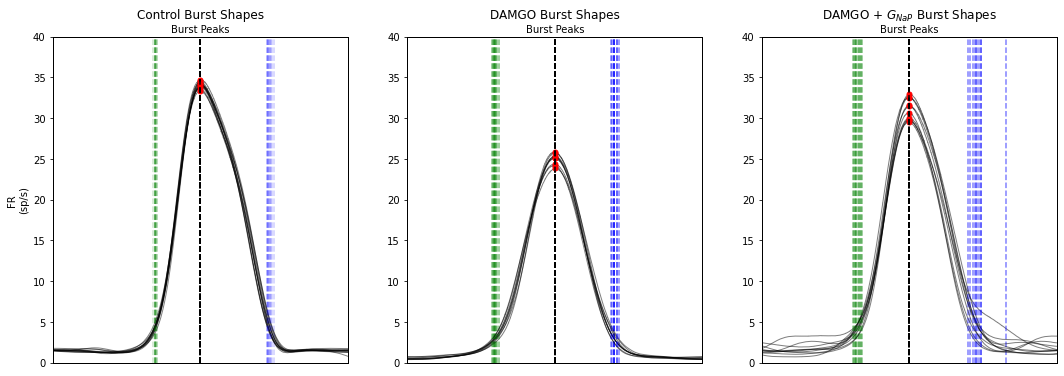

In [13]:
overlay_bursts(32,0.3,40)

### View irregularity plots

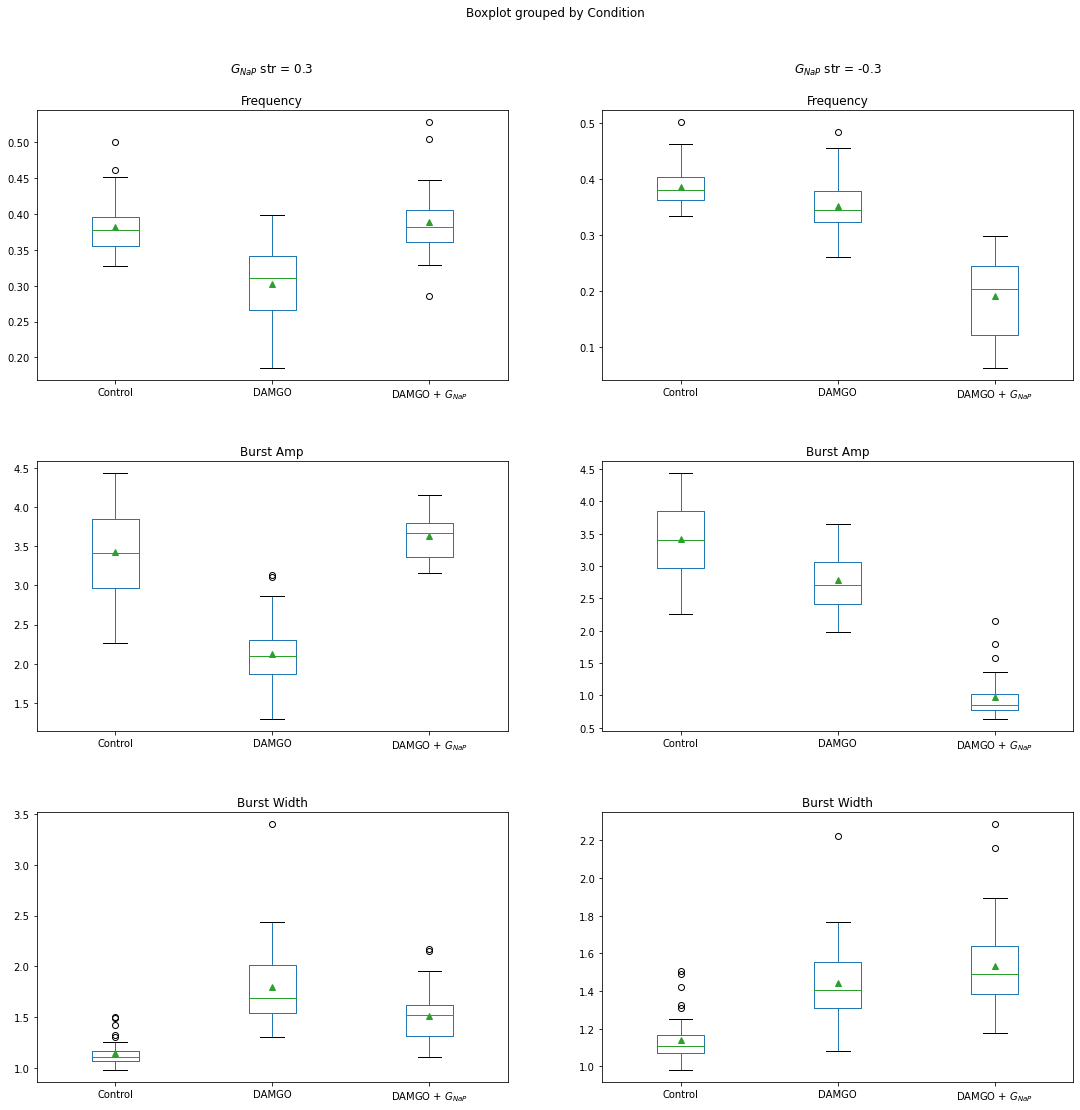

In [15]:
boxplots(df, 0.3)

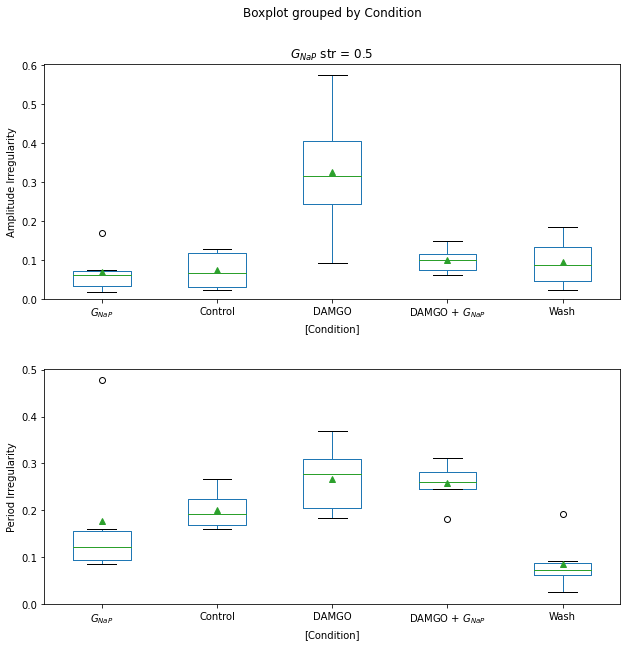

In [100]:
plot_irregularity(df, 0.5)

### View percent changes in frequency, amplitude, and width

In [ ]:
percent_change_plots(df)

### Create heatmap of response variable averages based on condition and g_nap_str

In [ ]:
# THIS IS A WORK IN PROGRESS
plt.figure()
heatmap_df = df.pivot_table(index = 'g_nap_str', columns = 'Condition', values = 'Frequency')
ax = sns.heatmap(heatmap_df, cmap = 'rocket', mask = heatmap_df.isnull(), vmin = 0, vmax = 0.7, cbar_kws={'label': 'Frequency'})
ax.invert_yaxis()
plt.yticks(rotation=0)
plt.show()
heatmap_df